### Flatiron School DS January 2019 Hackathon
* Emily J. Cain & Andrew Wester

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn.preprocessing import LabelEncoder
# from IPython.display import Image
# from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
# from sklearn.externals.six import StringIO
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, recall_score
from sklearn.metrics import make_scorer, recall_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [6]:
# for col in df.columns:
    # print(df[col].value_counts().nlargest(10))

In [7]:
df.TotalCharges.value_counts().nlargest(5)

20.2     11
         11
19.75     9
19.65     8
19.9      8
Name: TotalCharges, dtype: int64

In [8]:
# found by Andrew in CSV file
hidden_vals = ['4472-LVYGI', '3115-CZMZD', '5709-LVOEQ', '4367-NUYAO', '1371-DWPAZ', '7644-OMVMY', 
               '3213-VVOLG', '2520-SGTTA', '2923-ARZLG', '4075-WKNIU', '2775-SEFEE']

In [9]:
for val in hidden_vals:
    print(df.loc[df['customerID'] == val].index)

Int64Index([488], dtype='int64')
Int64Index([753], dtype='int64')
Int64Index([936], dtype='int64')
Int64Index([1082], dtype='int64')
Int64Index([1340], dtype='int64')
Int64Index([3331], dtype='int64')
Int64Index([3826], dtype='int64')
Int64Index([4380], dtype='int64')
Int64Index([5218], dtype='int64')
Int64Index([6670], dtype='int64')
Int64Index([6754], dtype='int64')


In [10]:
indices = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
for index in indices:
    df.drop(index=index, inplace=True)

In [11]:
df.TotalCharges.value_counts().nlargest(5)

20.2     11
19.75     9
19.65     8
20.05     8
19.9      8
Name: TotalCharges, dtype: int64

In [12]:
df.TotalCharges = df.TotalCharges.astype('float')

In [13]:
df.drop('customerID', inplace=True, axis=1)

In [14]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
# Convert yes/no columns

yes_no_columns = ['Partner',
                  'Dependents',
                  'PhoneService',
                  'OnlineSecurity',
                  'OnlineBackup',
                  'DeviceProtection',
                  'TechSupport',
                  'StreamingMovies',
                  'StreamingTV',
                  'PaperlessBilling',
                  'Churn'
                 ]

for col in yes_no_columns:
    df[col].replace(to_replace='Yes', value=1, inplace=True)
    df[col].replace(to_replace='No', value=0, inplace=True)

In [16]:
# Notes: don't need multiple phoneline columns, probably don't need streamingtv and streamingmovies - check correlation

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [18]:
df.gender.replace({'Female': 1, 'Male': 0}, inplace=True)

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [20]:
df.drop('MultipleLines', axis=1, inplace=True)

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [22]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001819,0.001379,-0.010349,-0.005285,0.007515,0.011902,0.013779,-0.000048,0.008545
SeniorCitizen,0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.156258,0.219874,0.102411,0.150541
Partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,-0.013957,0.097825,0.319072,-0.149982
Dependents,-0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.110131,-0.112343,0.064653,-0.163128
tenure,-0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.004823,0.246862,0.825880,-0.354049
PhoneService,0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,0.016696,0.248033,0.113008,0.011691
PaperlessBilling,0.011902,0.156258,-0.013957,-0.110131,0.004823,0.016696,1.000000,0.351930,0.157830,0.191454
MonthlyCharges,0.013779,0.219874,0.097825,-0.112343,0.246862,0.248033,0.351930,1.000000,0.651065,0.192858
TotalCharges,-0.000048,0.102411,0.319072,0.064653,0.825880,0.113008,0.157830,0.651065,1.000000,-0.199484
Churn,0.008545,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.191454,0.192858,-0.199484,1.000000


In [23]:
no_internet_columns = ['StreamingTV',
                      'StreamingMovies',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      ]

for col in no_internet_columns:
    df[col].replace({'No internet service': 0}, inplace=True)

In [24]:
for col in no_internet_columns:
    print(df[col].value_counts())

0    4329
1    2703
Name: StreamingTV, dtype: int64
0    4301
1    2731
Name: StreamingMovies, dtype: int64
0    5017
1    2015
Name: OnlineSecurity, dtype: int64
0    4607
1    2425
Name: OnlineBackup, dtype: int64
0    4614
1    2418
Name: DeviceProtection, dtype: int64
0    4992
1    2040
Name: TechSupport, dtype: int64


In [25]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
gender,1.000000,0.001819,0.001379,-0.010349,-0.005285,0.007515,0.016328,0.013093,0.000807,0.008507,0.007124,0.010105,0.011902,0.013779,-0.000048,0.008545
SeniorCitizen,0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,-0.038576,0.066663,0.059514,-0.060577,0.105445,0.119842,0.156258,0.219874,0.102411,0.150541
Partner,0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.143346,0.141849,0.153556,0.120206,0.124483,0.118108,-0.013957,0.097825,0.319072,-0.149982
Dependents,-0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,0.080786,0.023639,0.013900,0.063053,-0.016499,-0.038375,-0.110131,-0.112343,0.064653,-0.163128
tenure,-0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.328297,0.361138,0.361520,0.325288,0.280264,0.285402,0.004823,0.246862,0.825880,-0.354049
PhoneService,0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.091676,-0.052133,-0.070076,-0.095138,-0.021383,-0.033477,0.016696,0.248033,0.113008,0.011691
OnlineSecurity,0.016328,-0.038576,0.143346,0.080786,0.328297,-0.091676,1.000000,0.283285,0.274875,0.354458,0.175514,0.187426,-0.004051,0.296447,0.412619,-0.171270
OnlineBackup,0.013093,0.066663,0.141849,0.023639,0.361138,-0.052133,0.283285,1.000000,0.303058,0.293705,0.281601,0.274523,0.127056,0.441529,0.510100,-0.082307
DeviceProtection,0.000807,0.059514,0.153556,0.013900,0.361520,-0.070076,0.274875,0.303058,1.000000,0.332850,0.389924,0.402309,0.104079,0.482607,0.522881,-0.066193
TechSupport,0.008507,-0.060577,0.120206,0.063053,0.325288,-0.095138,0.354458,0.293705,0.332850,1.000000,0.277549,0.280155,0.037536,0.338301,0.432868,-0.164716


In [26]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [27]:
df.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [28]:
df.InternetService.replace({'Fiber optic': 1, 'DSL': 1, 'No': 0}, inplace=True)

In [29]:
df.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [30]:
df.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [31]:
df.PaymentMethod.replace({'Bank transfer (automatic)': 'Automatic', 'Credit card (automatic)': 'Automatic'}, inplace=True)

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,1,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,1,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,1,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,1,1,0,1,1,0,0,One year,0,Automatic,42.30,1840.75,0
4,1,0,0,0,2,1,1,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [33]:
df.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

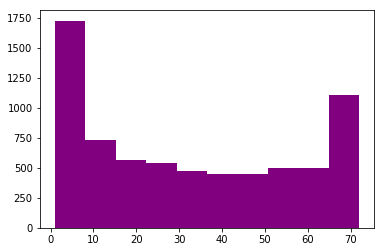

In [34]:
plt.hist(df.tenure, color='purple');

In [35]:
dummy_df = pd.get_dummies(df)
dummy_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,0,1,0,...,1,29.85,29.85,0,1,0,0,0,1,0
1,0,0,0,0,34,1,1,1,0,1,...,0,56.95,1889.50,0,0,1,0,0,0,1
2,0,0,0,0,2,1,1,1,1,0,...,1,53.85,108.15,1,1,0,0,0,0,1
3,0,0,0,0,45,0,1,1,0,1,...,0,42.30,1840.75,0,0,1,0,1,0,0
4,1,0,0,0,2,1,1,0,0,0,...,1,70.70,151.65,1,1,0,0,0,1,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 19 columns):
gender              7032 non-null int64
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int64
Dependents          7032 non-null int64
tenure              7032 non-null int64
PhoneService        7032 non-null int64
InternetService     7032 non-null int64
OnlineSecurity      7032 non-null int64
OnlineBackup        7032 non-null int64
DeviceProtection    7032 non-null int64
TechSupport         7032 non-null int64
StreamingTV         7032 non-null int64
StreamingMovies     7032 non-null int64
Contract            7032 non-null object
PaperlessBilling    7032 non-null int64
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null int64
dtypes: float64(2), int64(15), object(2)
memory usage: 1.1+ MB


In [39]:
y = dummy_df.Churn
X = dummy_df.drop('Churn', axis=1)

In [40]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [43]:
scaled_df = pd.DataFrame(scaled_X, index=X.index, columns=X.columns)

In [44]:
scaled_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Automatic,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.009430,-0.440327,1.035617,-0.652305,-1.280248,-3.056334,0.52513,-0.633746,1.378330,-0.723918,...,-0.796849,0.828939,-1.161694,-0.994194,0.902613,-0.514537,-0.561364,-0.878482,1.404764,-0.543604
1,-0.990658,-0.440327,-0.965608,-0.652305,0.064303,0.327189,0.52513,1.577918,-0.725516,1.381372,...,-0.796849,-1.206361,-0.260878,-0.173740,-1.107895,1.943495,-0.561364,-0.878482,-0.711863,1.839576
2,-0.990658,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,0.52513,1.577918,1.378330,-0.723918,...,-0.796849,0.828939,-0.363923,-0.959649,0.902613,-0.514537,-0.561364,-0.878482,-0.711863,1.839576
3,-0.990658,-0.440327,-0.965608,-0.652305,0.512486,-3.056334,0.52513,1.577918,-0.725516,1.381372,...,-0.796849,-1.206361,-0.747850,-0.195248,-1.107895,1.943495,-0.561364,1.138327,-0.711863,-0.543604
4,1.009430,-0.440327,-0.965608,-0.652305,-1.239504,0.327189,0.52513,-0.633746,-0.725516,-0.723918,...,-0.796849,0.828939,0.196178,-0.940457,0.902613,-0.514537,-0.561364,-0.878482,1.404764,-0.543604


In [45]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, random_state=19)

#### Try some vanilla models

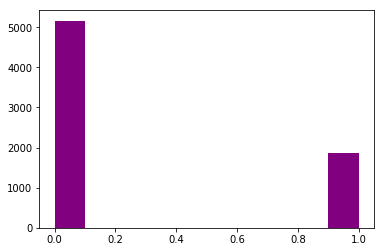

In [47]:
plt.hist(y, color='purple');

In [48]:
dt = DecisionTreeClassifier(random_state=19, class_weight='balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=19,
            splitter='best')

In [49]:
dt_train_preds = dt.predict(X_train)
dt_test_preds = dt.predict(X_test)

In [50]:
def print_metrics(y_train, y_test, y_train_preds, y_test_preds):
    print('Train Set Classification Report')
    print(classification_report(y_train, y_train_preds))
    print('*'*50)
    print('Test Set Classification Report')
    print(classification_report(y_test, y_test_preds))
    print('*'*50)
    print('Train Set Confusion Matrix')
    print(confusion_matrix(y_train, y_train_preds))
    print('*'*50)
    print('Test Set Confusion Matrix')
    print(confusion_matrix(y_test, y_test_preds))
    print('*'*50)
    print('Train Set Accuracy Score')
    print(accuracy_score(y_train, y_train_preds))
    print('*'*50)
    print('Test Set Accuracy Score')
    print(accuracy_score(y_test, y_test_preds))

In [51]:
print_metrics(y_train, y_test, dt_train_preds, dt_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3878
           1       0.99      1.00      1.00      1396

   micro avg       1.00      1.00      1.00      5274
   macro avg       1.00      1.00      1.00      5274
weighted avg       1.00      1.00      1.00      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1285
           1       0.51      0.53      0.52       473

   micro avg       0.74      0.74      0.74      1758
   macro avg       0.67      0.67      0.67      1758
weighted avg       0.74      0.74      0.74      1758

**************************************************
Train Set Confusion Matrix
[[3870    8]
 [   0 1396]]
**************************************************
Test Set Confusion Matrix
[[1046  239]
 [ 224  249]]
***********************

In [58]:
rf = RandomForestClassifier(random_state=19, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False, random_state=19,
            verbose=0, warm_start=False)

In [59]:
rf_train_preds = rf.predict(X_train)
rf_test_preds = rf.predict(X_test)

In [60]:
print_metrics(y_train, y_test, rf_train_preds, rf_test_preds)

Train Set Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3878
           1       0.99      0.93      0.96      1396

   micro avg       0.98      0.98      0.98      5274
   macro avg       0.98      0.97      0.97      5274
weighted avg       0.98      0.98      0.98      5274

**************************************************
Test Set Classification Report
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1285
           1       0.62      0.44      0.51       473

   micro avg       0.78      0.78      0.78      1758
   macro avg       0.72      0.67      0.68      1758
weighted avg       0.76      0.78      0.76      1758

**************************************************
Train Set Confusion Matrix
[[3866   12]
 [  93 1303]]
**************************************************
Test Set Confusion Matrix
[[1159  126]
 [ 266  207]]
***********************